In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from transformers import pipeline

In [3]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      top_k=None)

In [4]:
path = os.path.join("..","in","Game_of_Thrones_Script.csv")

In [42]:
data = pd.read_csv(path)

In [43]:
data['Season'] = data['Season'].str.extract(r'(\d+)', expand=False).astype(int)
data['Episode'] = data['Episode'].str.extract(r'(\d+)', expand=False).astype(int)
data_test = data.copy()

In [44]:
predictions = []
for sentence in tqdm(data_test["Sentence"]):
    try:
        predictions.append(classifier(str(sentence), top_k=1))
    except ValueError:
        print(f'ValueError; Skipping {sentence}')
        continue

100%|██████████| 23911/23911 [06:35<00:00, 60.51it/s]


In [47]:
labels = []
label_scores = []
for result in predictions:
    labels.append(result[0]['label'])
    label_scores.append(result[0]['score'])
data_test['Label'] = labels
data_test['Score'] = label_scores

In [48]:
labels = data_test['Label'].unique()

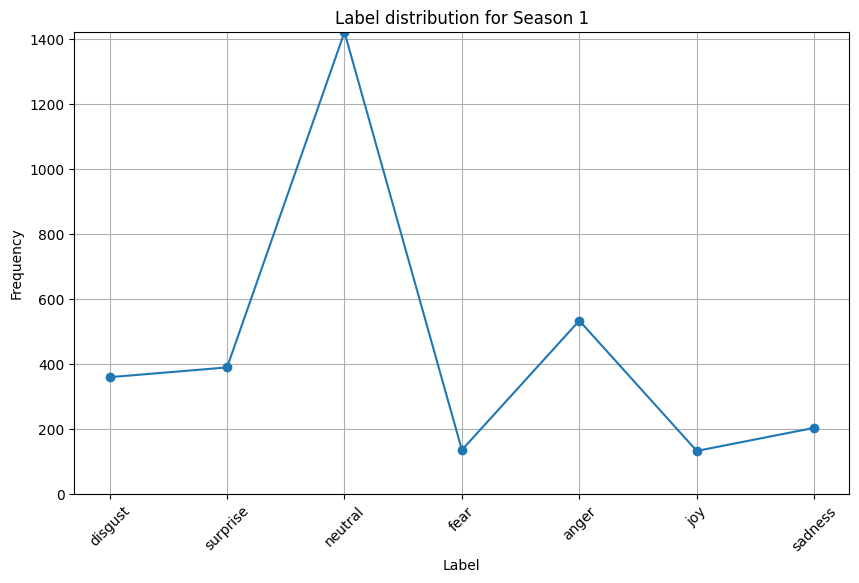

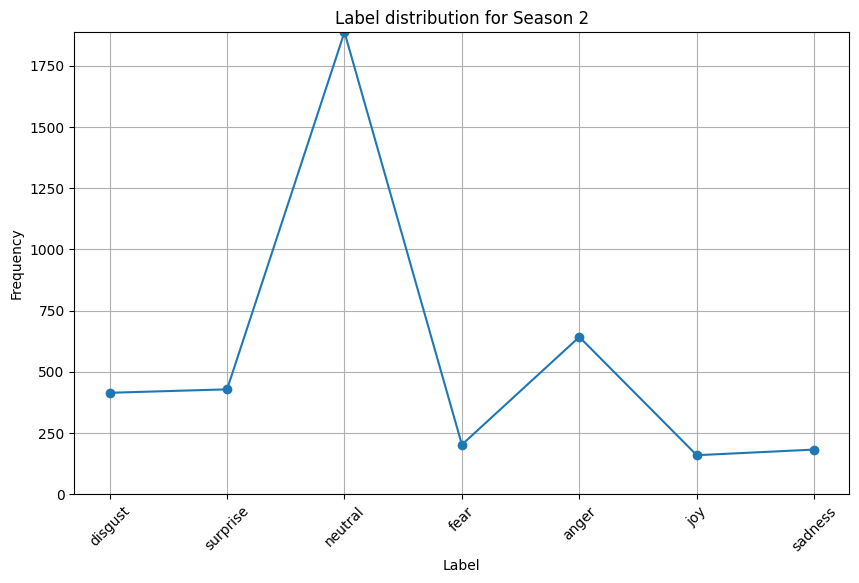

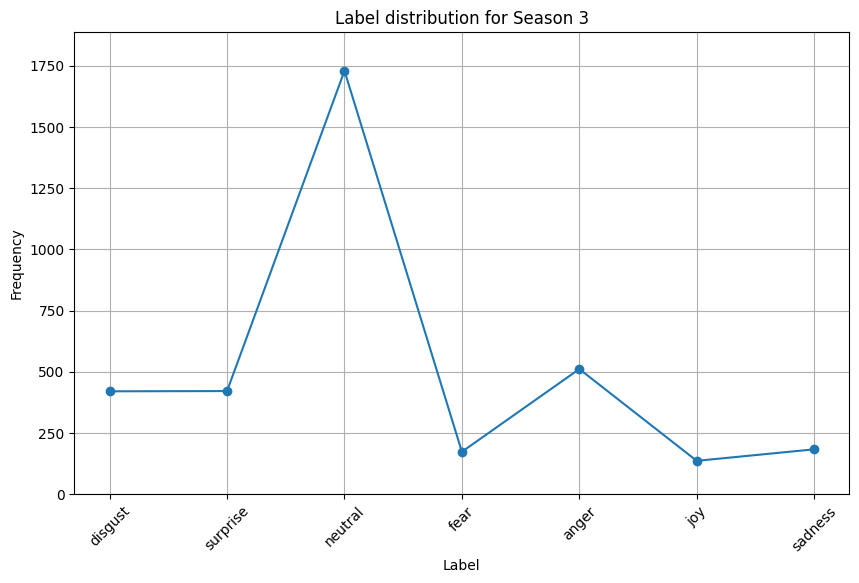

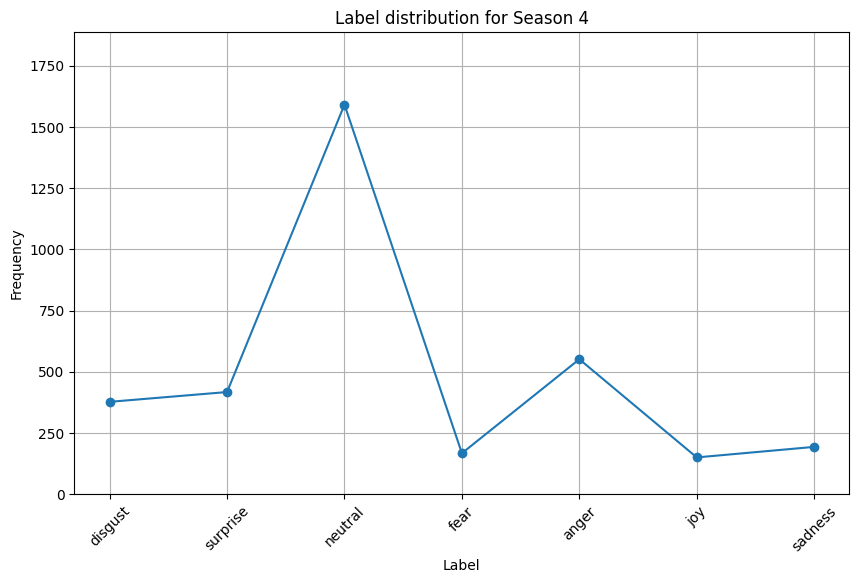

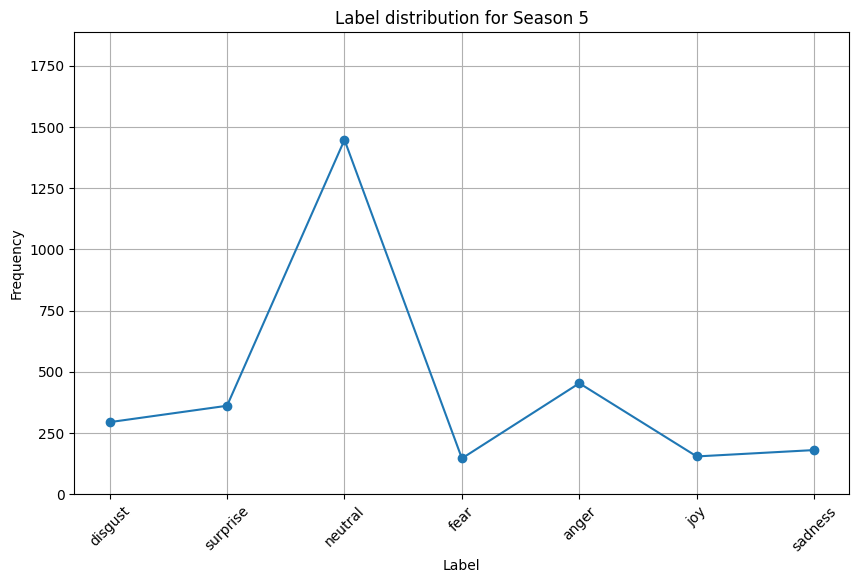

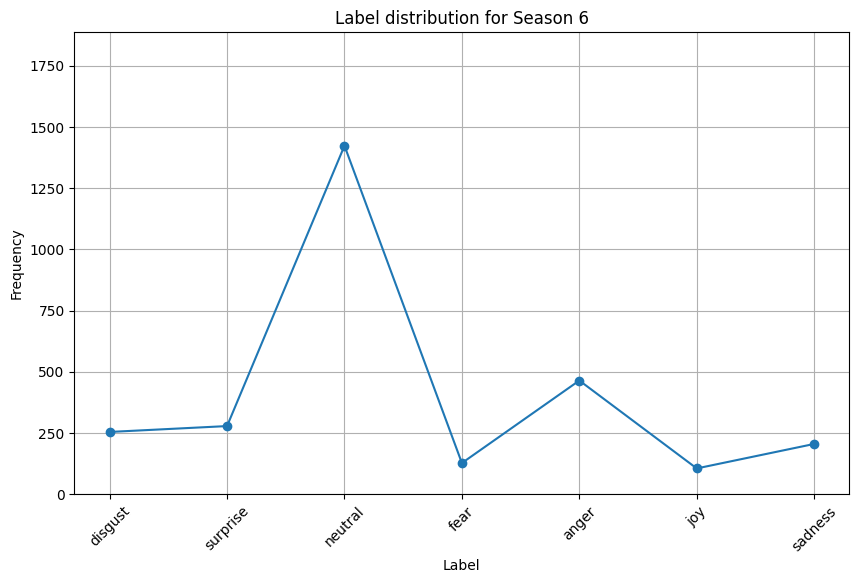

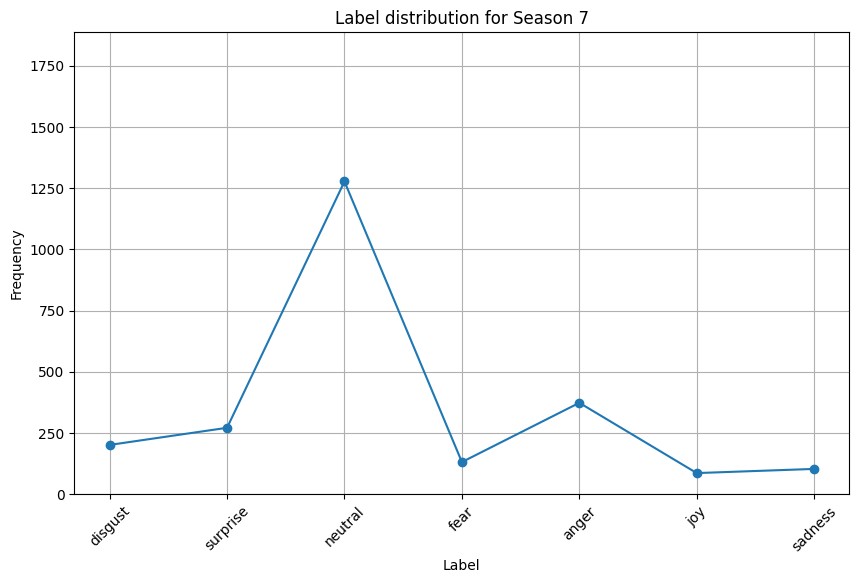

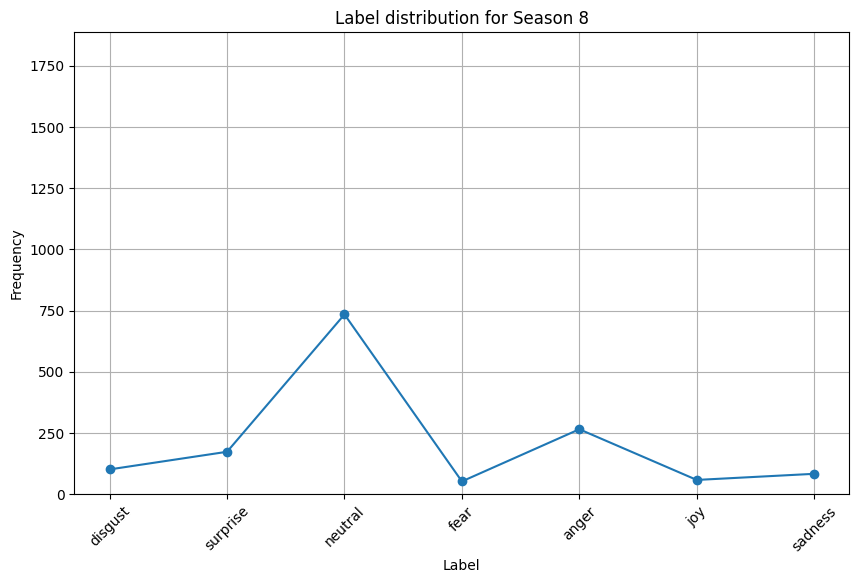

In [49]:

# Plot the distribution for each season
seasons = sorted(data_test['Season'].unique())
max_frequency = 0  # Initialize maximum frequency
for season in seasons:
    season_data = data_test[data_test['Season'] == season]
    label_counts = season_data['Label'].value_counts().reindex(labels, fill_value=0)
    max_frequency = max(max_frequency, label_counts.max())  # Update maximum frequency
    label_counts.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title(f'Label distribution for Season {season}')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.ylim(0, max_frequency)  # Set y-axis limit to the maximum frequency
    plt.grid(True)
    plt.show()

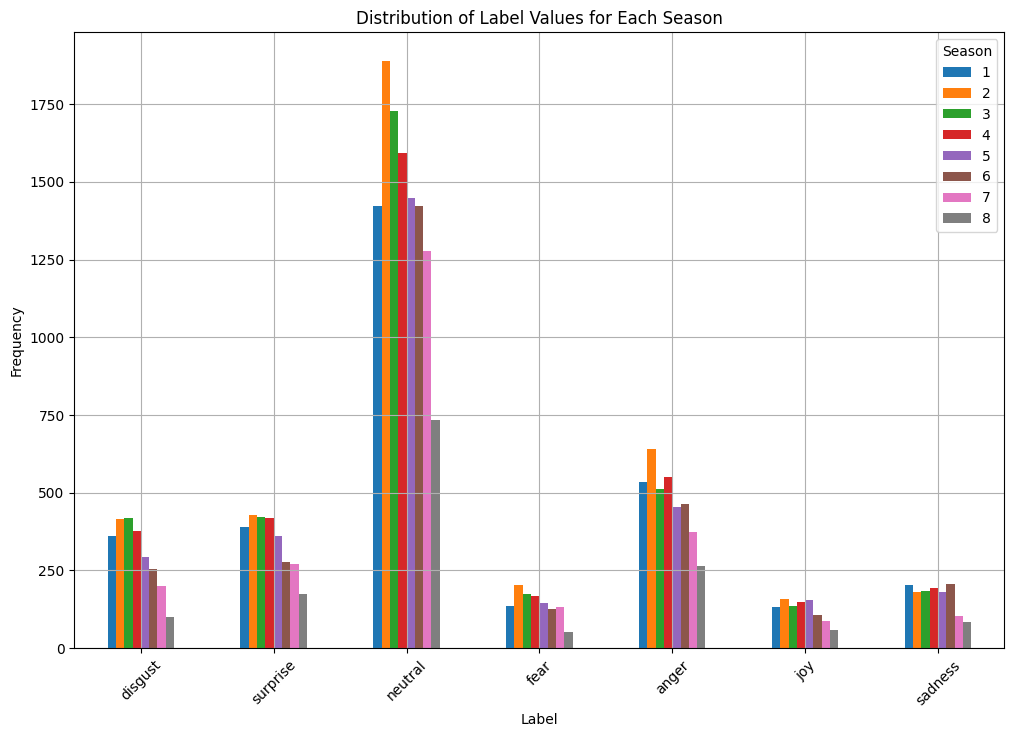

In [53]:
label_counts_by_season = {season: {} for season in data_test['Season'].unique()}

# Accumulate label counts for each season
for season, season_data in data_test.groupby('Season'):
    label_counts = season_data['Label'].value_counts().reindex(labels, fill_value=0)
    label_counts_by_season[season] = label_counts

# Convert dictionary to DataFrame for easier plotting
label_counts_df = pd.DataFrame(label_counts_by_season, index=labels)

# Plot the grouped bar plot
label_counts_df.plot(kind='bar', figsize=(12, 8))

plt.title('Distribution of Label Values for Each Season')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.savefig(os.path.join("..","out","Distribution of label values for each season.png"))
plt.show()

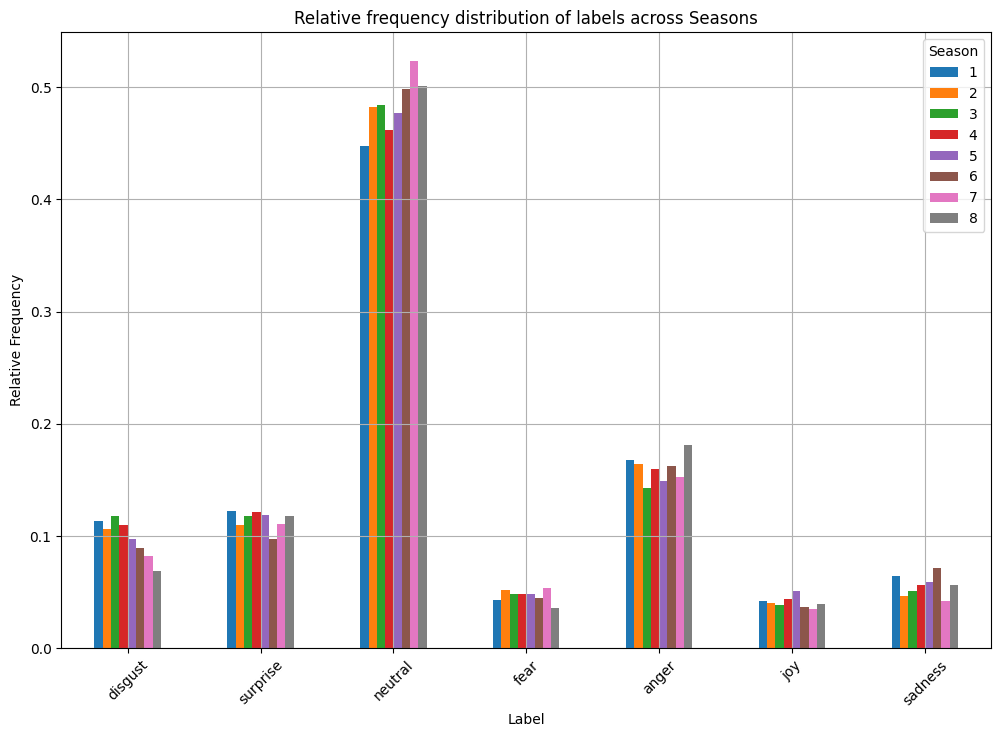

In [54]:
#labels = data_test['Label'].unique()

# Initialize an empty dictionary to store relative label frequencies for each season
relative_frequencies_by_season = {}
for season in data_test['Season'].unique():
    relative_frequencies_by_season[season] = []

# Calculate relative frequencies for each season
for season, season_data in data_test.groupby('Season'):
    label_counts = season_data['Label'].value_counts().reindex(labels, fill_value=0)
    total_labels = label_counts.sum()
    relative_frequencies = label_counts / total_labels
    relative_frequencies_by_season[season] = relative_frequencies

# Convert dictionary to DataFrame for easier plotting
relative_frequencies_df = pd.DataFrame(relative_frequencies_by_season, index=labels)

# Plot the grouped bar plot
relative_frequencies_df.plot(kind='bar', figsize=(12, 8))

plt.title('Relative frequency distribution of labels across Seasons')
plt.xlabel('Label')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.savefig(os.path.join("..","out", "Relative frequency across seasons.png"))
plt.show()